In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#  Partie pratique

In [2]:
# Q1
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from TP07_K_plus_proches_voisins.src.utils import add_decision_boundary

models = [(LinearDiscriminantAnalysis, "LDA"), 
          (QuadraticDiscriminantAnalysis, "QDA"), 
          (GaussianNB, "NB")]

def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc
            
def add_decision_boundaries(df, models):
    colors = sns.color_palette()
    for model, name in models:
        y = df.z
        X = df.drop(columns=["z"])
        cls = model()
        cls.fit(X, y)
        add_decision_boundary(cls, label=name, color=colors.pop(), region=False)

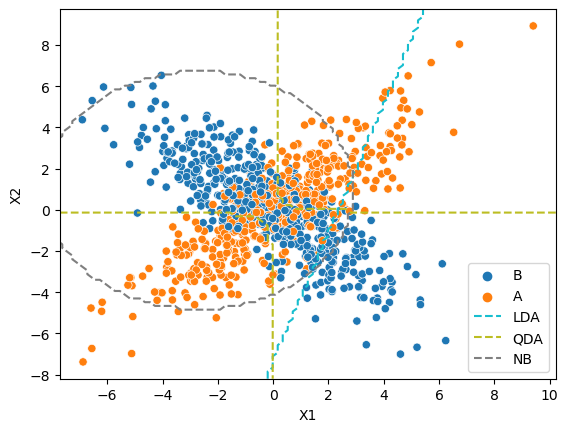

In [3]:
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthCross_n1000_p2.csv")
sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)
plt.show()

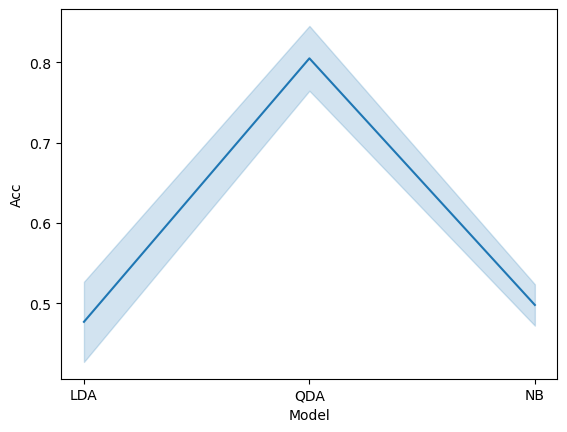

In [4]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

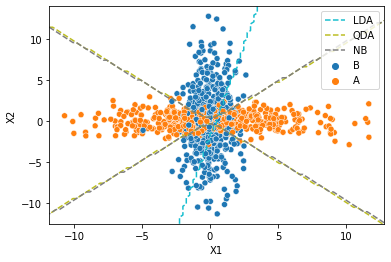

In [5]:
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPlus_n1000_p2.csv")
sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)
plt.show()

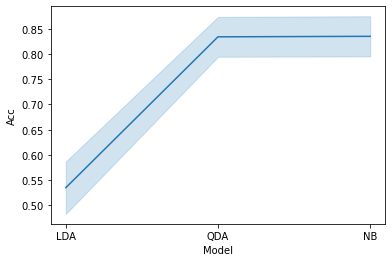

In [6]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

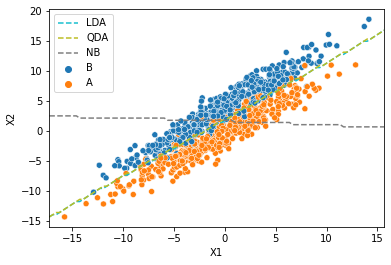

In [7]:
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPara_n1000_p2.csv")
sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)
plt.show()

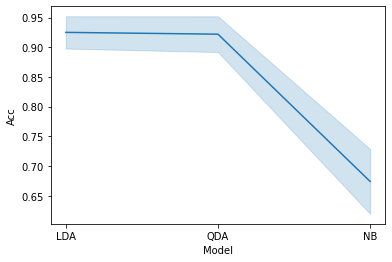

In [8]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

(1000, 301)


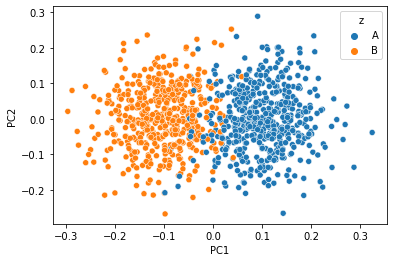

In [9]:
# Q2
from TP06_K_means.src.utils import scatterplot_pca
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthBlob_n1000_p300.csv.gz")
print(df.shape)
scatterplot_pca(data=df, hue="z")
plt.show()

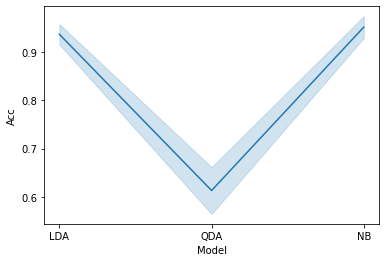

In [10]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

(1000, 301)


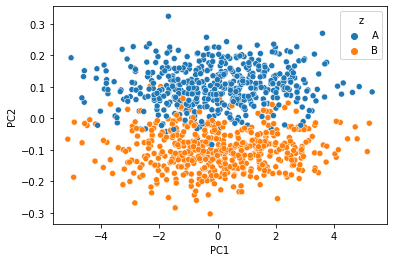

In [11]:
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPara_n1000_p300.csv.gz")
print(df.shape)
scatterplot_pca(data=df, hue="z")
plt.show()

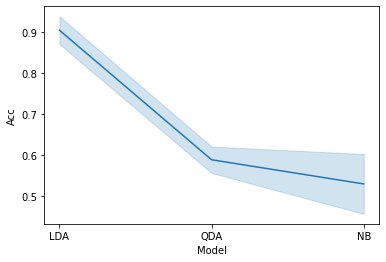

In [12]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

(1000, 301)


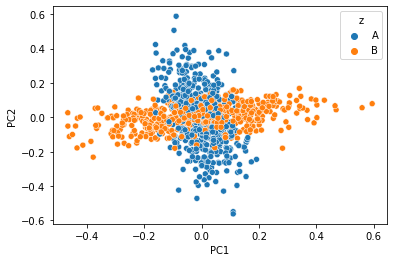

In [13]:
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPlus_n1000_p300.csv.gz")
print(df.shape)
scatterplot_pca(data=df, hue="z")
plt.show()

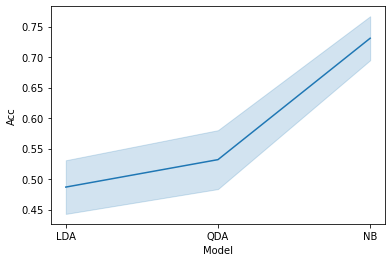

In [14]:
df = pd.DataFrame(validation_errors(df, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

(1000, 3)
(1000, 301)


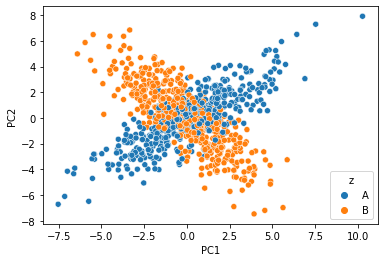

In [15]:
# Q3
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthCross_n1000_p2.csv")
print(df.shape)
rng = np.random.default_rng()
df300 = pd.concat((df, pd.DataFrame(.1*rng.normal(size=(1000, 298)))), axis=1)
print(df300.shape)
scatterplot_pca(data=df300, hue="z")
plt.show()

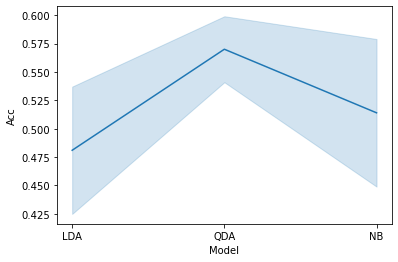

In [16]:
df = pd.DataFrame(validation_errors(df300, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

In [17]:
pred = pd.Series(np.where(df300.X1 * df300.X2 > 0, "A", "B"))
np.mean(pred == df300.z)

0.802

# Partie théorique

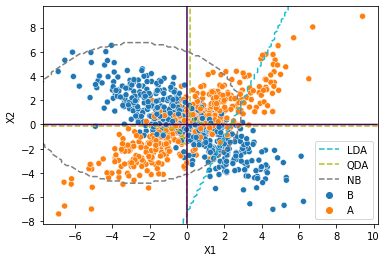

In [18]:
# Q7
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthCross_n1000_p2.csv")
ax = sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

resolution = 1000

xx = np.linspace(xlim[0], xlim[1], resolution)
yy = np.linspace(ylim[0], ylim[1], resolution)

X, Y = np.meshgrid(xx, yy)

Z = X * Y

plt.contour(X, Y, Z, levels=[0])
plt.show()

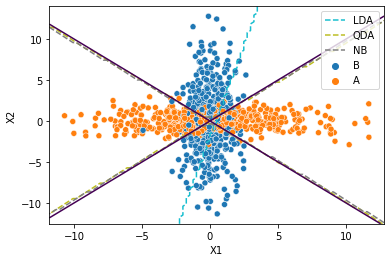

In [19]:
# Q9
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPlus_n1000_p2.csv")
ax = sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

resolution = 1000

xx = np.linspace(xlim[0], xlim[1], resolution)
yy = np.linspace(ylim[0], ylim[1], resolution)

X, Y = np.meshgrid(xx, yy)

Z = X**2-Y**2

plt.contour(X, Y, Z, levels=[0])
plt.show()

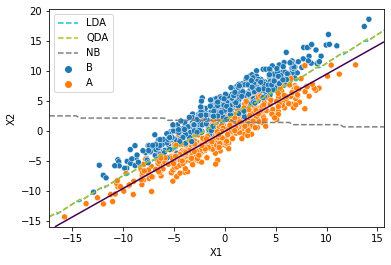

In [20]:
# Q11
df = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPara_n1000_p2.csv")
ax = sns.scatterplot(x="X1", y="X2", data=df, hue="z")
add_decision_boundaries(df, models)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

resolution = 1000

xx = np.linspace(xlim[0], xlim[1], resolution)
yy = np.linspace(ylim[0], ylim[1], resolution)

X, Y = np.meshgrid(xx, yy)

Z = 39*X-41*Y

plt.contour(X, Y, Z, levels=[0])
plt.show()